In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import DistanceMetric

# Overivew of American Data Set

In [2]:
!pwd

/Users/Andrew/Desktop/final_project_gtech/isye_6740_final_project_accents


In [3]:
df_train = pd.read_csv('../data/archive/train_data.csv')
df_test = pd.read_csv('../data/archive/test_data.csv')

In [4]:
df_train.dropna(how='all', inplace=True)
df_test.dropna(how='all', inplace=True)

In [5]:
accent_map = {
    'DR1':'New England',
    'DR2':'Northern',
    'DR3': 'North Midland',
    'DR4': 'South Midland',
    'DR5': 'Southern', 
    'DR6': 'New York City',
    'DR7': 'Western',
    'DR8': 'Moved Around'
}

In [6]:
df_train['dialect_region'] = df_train['dialect_region'].map(accent_map)
df_test['dialect_region'] = df_test['dialect_region'].map(accent_map)

### Number of Speakers

dialect_region
Moved Around     22
New York City    35
New England      38
South Midland    68
Southern         70
North Midland    76
Northern         76
Western          77
Name: speaker_id, dtype: int64

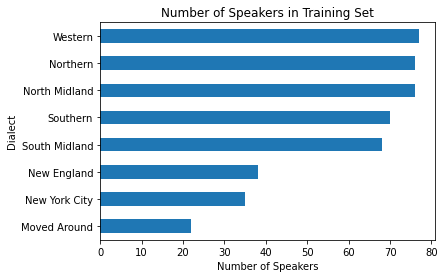

In [7]:
df_train.groupby('dialect_region')['speaker_id'].nunique().sort_values().plot(kind='barh')
plt.title('')
plt.xlabel('Number of Speakers')
plt.ylabel('Dialect')
plt.title('Number of Speakers in Training Set')
plt.savefig('eda_final_report/train_speakers.png')

df_train.groupby('dialect_region')['speaker_id'].nunique().sort_values()

dialect_region
Moved Around     11
New England      11
New York City    11
Western          23
North Midland    26
Northern         26
Southern         28
South Midland    32
Name: speaker_id, dtype: int64

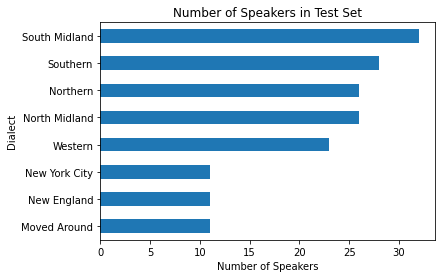

In [8]:
df_test.groupby('dialect_region')['speaker_id'].nunique().sort_values().plot(kind='barh')
plt.xlabel('Number of Speakers')
plt.ylabel('Dialect')
plt.title('Number of Speakers in Test Set')
plt.savefig('eda_final_report/test_speakers.png')

df_test.groupby('dialect_region')['speaker_id'].nunique().sort_values()

In [9]:
# number of speaker IDs in train that are in test 
df_train.speaker_id.isin(df_test.speaker_id).sum(), df_test.speaker_id.isin(df_train.speaker_id).sum()

(0, 0)

### Sex

In [10]:
df_train['sex'] = df_train.speaker_id.str[0]
df_test['sex'] = df_test.speaker_id.str[0]

sex
F    136
M    326
Name: speaker_id, dtype: int64

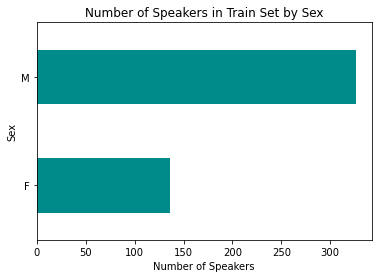

In [11]:
df_train.groupby('sex')['speaker_id'].nunique().sort_values().plot(kind='barh', color='#008B8B')
plt.xlabel('Number of Speakers')
plt.ylabel('Sex')
plt.title('Number of Speakers in Train Set by Sex')
plt.savefig('eda_final_report/train_sex.png')

df_train.groupby('sex')['speaker_id'].nunique().sort_values()

sex
F     56
M    112
Name: speaker_id, dtype: int64

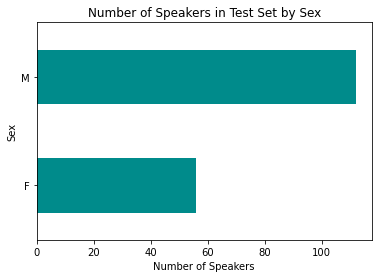

In [12]:
df_test.groupby('sex')['speaker_id'].nunique().sort_values().plot(kind='barh', color='#008B8B')
plt.xlabel('Number of Speakers')
plt.ylabel('Sex')
plt.title('Number of Speakers in Test Set by Sex')
plt.savefig('eda_final_report/test_sex.png')

df_test.groupby('sex')['speaker_id'].nunique().sort_values()

# words

In [13]:
from os import listdir
from os.path import isfile, join
from collections import Counter

file_names = listdir('../data/train_words')

In [14]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

,word,count
word,,
the,the,1603
to,to,1018
in,in,947
a,a,867
that,that,612
she,she,572
an,an,571
your,your,565
all,all,545


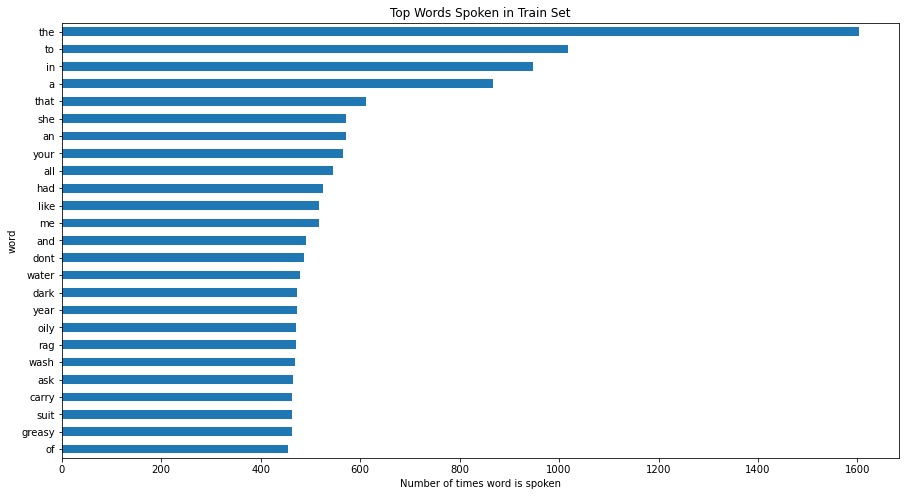

In [15]:
df_train_words = pd.DataFrame(count_dict.most_common(25), columns=['word', 'count'])
df_train_words.index = df_train_words.word

plt.figure(figsize=(15,8))
df_train_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times word is spoken')
plt.title('Top Words Spoken in Train Set')
plt.savefig('eda_final_report/word_counts_train.png')

df_train_words.sort_values('count', ascending=False)

,word,count
word,,
the,the,599
to,to,352
in,in,313
a,a,301
all,all,223
that,that,215
she,she,208
an,an,207
your,your,202


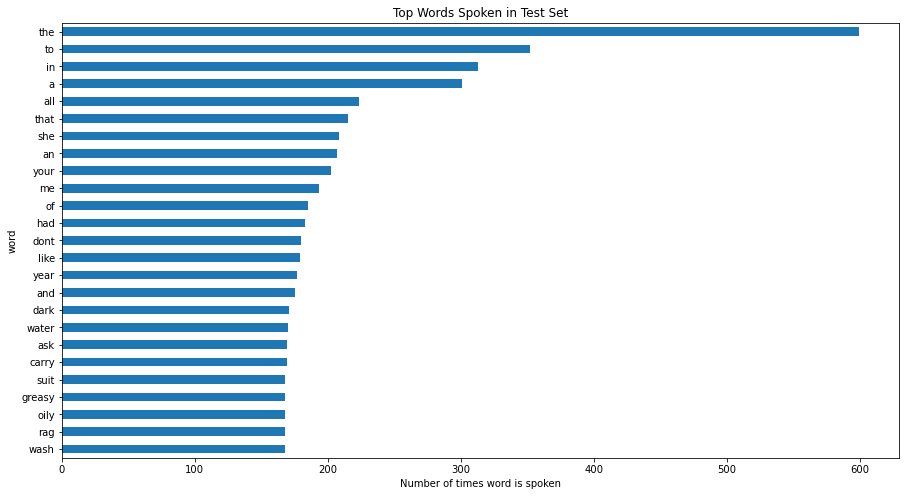

In [16]:
file_names = listdir('../data/test_words')
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

plt.figure(figsize=(15,8))

df_test_words = pd.DataFrame(count_dict.most_common(25), columns=['word', 'count'])
df_test_words.index = df_test_words.word

df_test_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times word is spoken')
plt.title('Top Words Spoken in Test Set')
plt.savefig('eda_final_report/word_counts_test.png')

df_test_words.sort_values('count', ascending=False)

### phonemes

In [17]:
file_names = listdir('../data/phoneme_train')

,phoneme,count
phoneme,,
ix,ix,8658
s,s,7519
n,n,7145
iy,iy,6975
tcl,tcl,6644
r,r,6571
kcl,kcl,5859
l,l,5819
ih,ih,5066


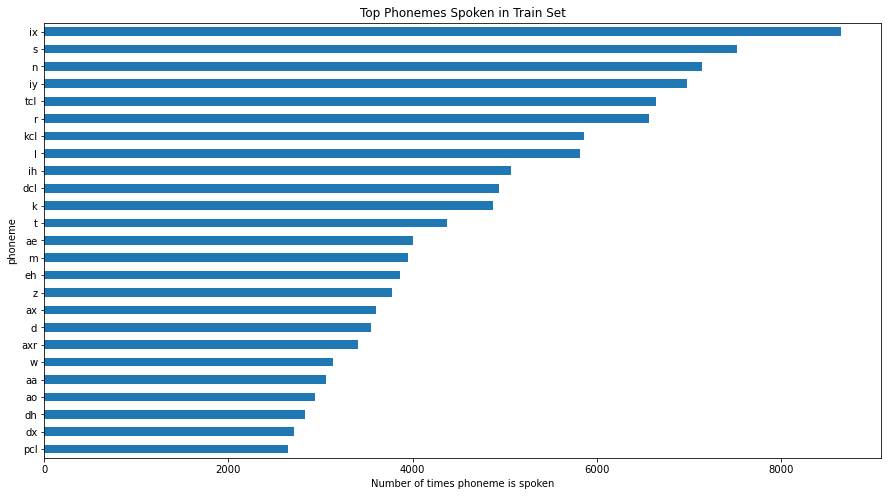

In [18]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

plt.figure(figsize=(15,8))

df_train_words = pd.DataFrame(count_dict.most_common(25), columns=['phoneme', 'count'])
df_train_words.index = df_train_words.phoneme

df_train_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times phoneme is spoken')
plt.title('Top Phonemes Spoken in Train Set')
plt.savefig('eda_final_report/phoneme_counts_train.png')

df_train_words.sort_values('count', ascending=False)

In [19]:
file_names = listdir('../data/phoneme_test')

,phoneme,count
phoneme,,
ix,ix,3249
iy,iy,3071
s,s,2979
r,r,2837
n,n,2801
l,l,2678
tcl,tcl,2649
kcl,kcl,2162
ih,ih,1953


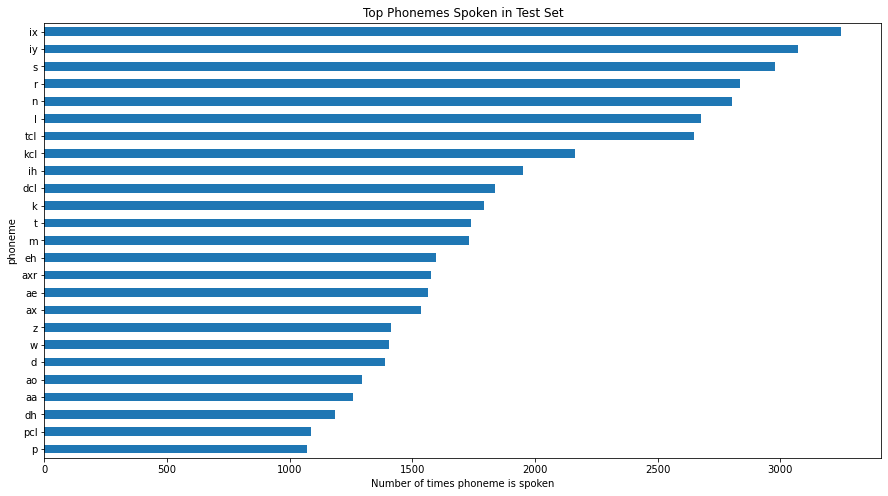

In [20]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    count_dict[word] += 1

plt.figure(figsize=(15,8))

df_test_words = pd.DataFrame(count_dict.most_common(25), columns=['phoneme', 'count'])
df_test_words.index = df_test_words.phoneme

df_test_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times phoneme is spoken')
plt.title('Top Phonemes Spoken in Test Set')
plt.savefig('eda_final_report/phoneme_counts_test.png')

df_test_words.sort_values('count', ascending=False)

# British Set Overview

In [21]:
df_british = pd.read_csv('../data/british_data_set_word_files/df.csv')

In [22]:
df_british['sex'] = df_british.speaker.str.lower().str[0]

In [23]:
# number of speakers
df_british.speaker.nunique()

68

sex
f    18
m    50
Name: speaker, dtype: int64

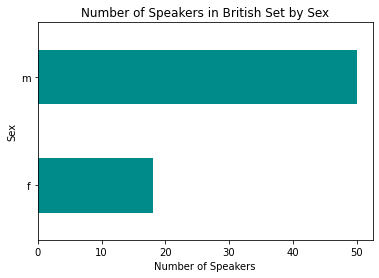

In [24]:
# speakers by gender
df_british.groupby('sex')['speaker'].nunique().sort_values().plot(kind='barh', color='#008B8B')
plt.xlabel('Number of Speakers')
plt.ylabel('Sex')
plt.title('Number of Speakers in British Set by Sex')
plt.savefig('eda_final_report/british_set_sex.png')

df_british.groupby('sex')['speaker'].nunique().sort_values()

have     258
this     268
by       270
be       273
one      278
you      299
his      305
with     312
but      321
at       322
i        361
it       410
as       415
on       417
is       429
he       451
for      532
was      590
that     591
a       1177
in      1242
to      1296
and     1503
of      1556
the     3523
Name: word, dtype: int64

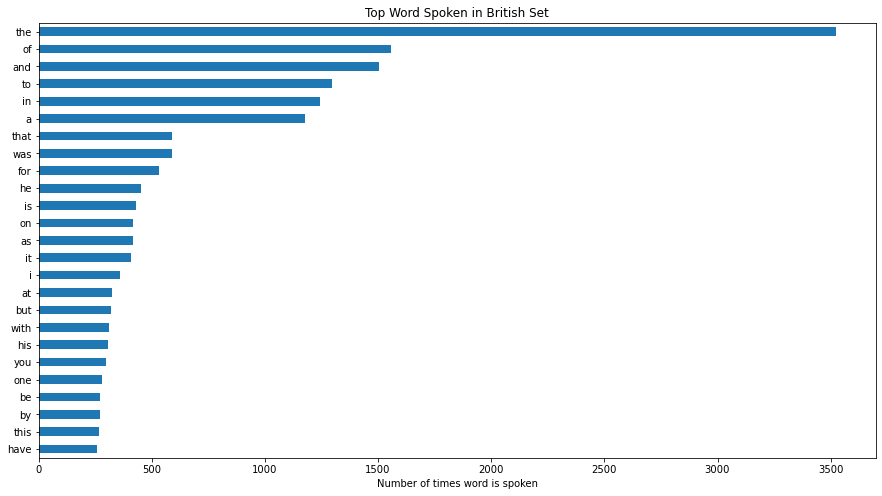

In [25]:
# most common words
plt.figure(figsize=(15,8))

df_british.word.str.lower().value_counts()[0:25].sort_values().plot(kind='barh')

plt.xlabel('Number of times word is spoken')
plt.title('Top Word Spoken in British Set')
plt.savefig('eda_final_report/british_word_counts.png')
df_british.word.str.lower().value_counts()[0:25].sort_values()

In [26]:
df_british.word.nunique()

7318

### words in common

In [27]:
df_british.word.str.lower().nunique()

7318

In [28]:
american_file_names = listdir('../data/train_words') + listdir('../data/test_words')

In [29]:
american_words = set([x.split('_')[0] for x in american_file_names])

# number of unique american words
len(american_words)

6078

In [30]:
common_words = american_words.intersection(df_british.word.str.lower())

# number of words in common
len(common_words)

2726

In [31]:
american_word_counts = Counter()

for filename in american_file_names:
    word = filename.split('_')[0]
    american_word_counts[word] += 1

In [32]:
df_british_word_counts = pd.DataFrame(df_british.word.str.lower().value_counts())
df_british_word_counts.rename(columns={'word':'british_word_count'}, inplace=True)

In [33]:
df_american_word_counts = pd.DataFrame.from_dict(dict(american_word_counts), orient='index', columns=['american_word_count'])

In [34]:
df_word_counts = df_british_word_counts.merge(df_american_word_counts, left_index=True, right_index=True, how='outer')
df_word_counts.fillna(0,inplace=True)

have     258
this     268
by       270
be       273
one      278
you      299
his      305
with     312
but      321
at       322
i        361
it       410
as       415
on       417
is       429
he       451
for      532
was      590
that     591
a       1177
in      1242
to      1296
and     1503
of      1556
the     3523
Name: word, dtype: int64

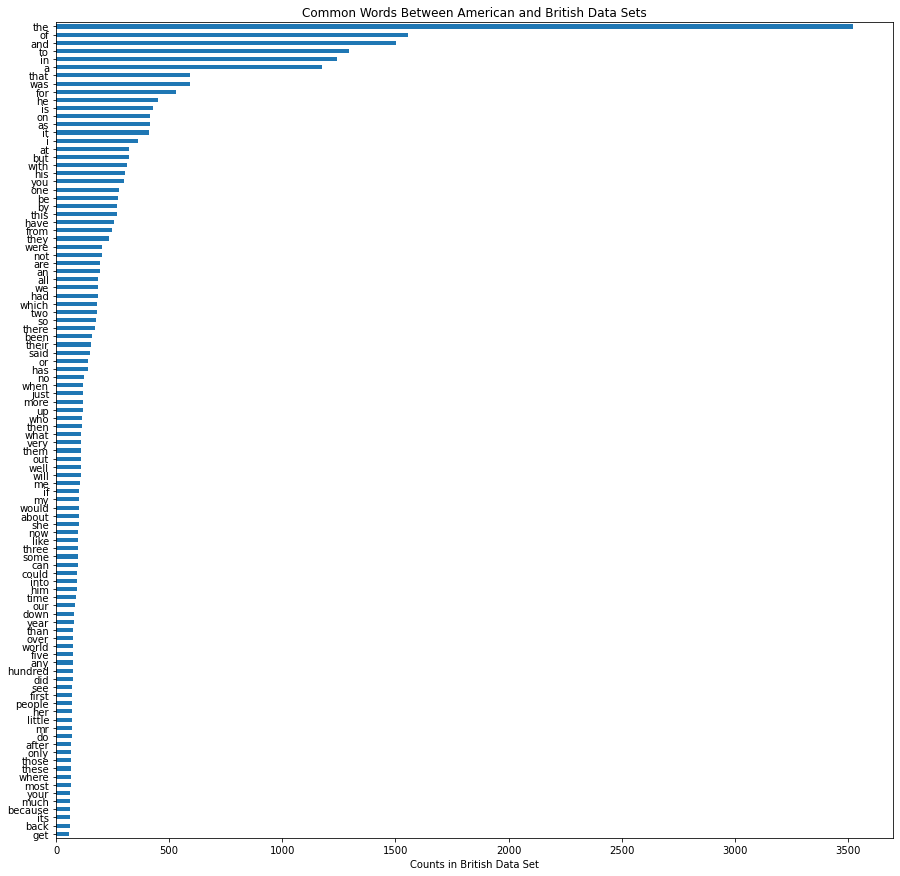

In [35]:
df_word_counts['multiplied'] = df_word_counts['british_word_count'] * df_word_counts['american_word_count']

plt.figure(figsize=(15,15))

df_word_counts.sort_values('multiplied', ascending=False).sort_values('british_word_count', ascending=False)['british_word_count'][0:100].sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Counts in British Data Set')
plt.title('Common Words Between American and British Data Sets')
plt.savefig('eda_final_report/british_american_common_word_counts.png')
df_british.word.str.lower().value_counts()[0:25].sort_values()

# British phonemes

In [36]:
file_names = listdir('../data/british_phonemes')

,phoneme,count
phoneme,,
@,@,22256
i,i,18557
n,n,17982
t,t,15082
d,d,13822
s,s,11730
l,l,8168
r,r,6891
v,v,6706


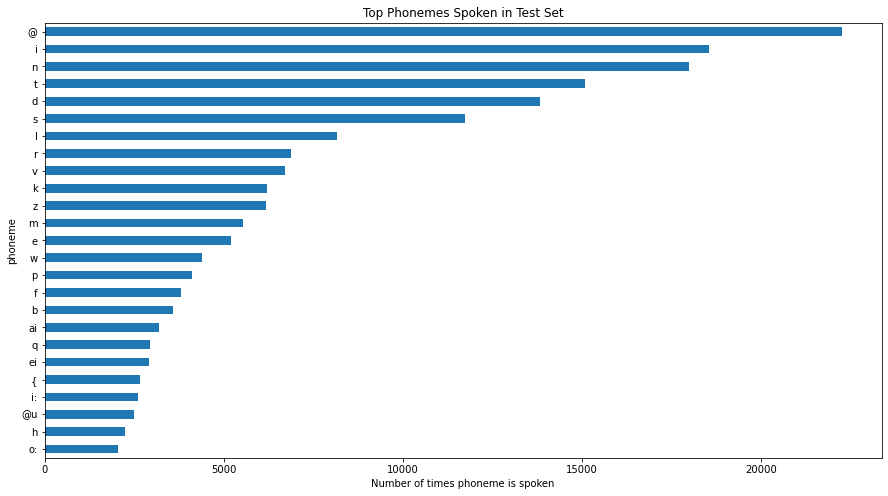

In [37]:
count_dict = Counter()

for x in file_names:
    meta_data = x.split('_')
    word = meta_data[0].lower()
    if word != '':
        count_dict[word] += 1

plt.figure(figsize=(15,8))

df_test_words = pd.DataFrame(count_dict.most_common(25), columns=['phoneme', 'count'])
df_test_words.index = df_test_words.phoneme

df_test_words['count'].sort_values().plot(kind='barh')
plt.xlabel('Number of times phoneme is spoken')
plt.title('Top Phonemes Spoken in Test Set')
plt.savefig('eda_final_report/phoneme_counts_test.png')

df_test_words.sort_values('count', ascending=False)

# Explore Phonemes

In [38]:
df_train_ph = pd.read_csv('../data/train_formants_phonemes.csv')
df_test_ph = pd.read_csv('../data/test_formants_phonemes.csv')
df_brit_ph = pd.read_csv('../data/british_formants_phonemes.csv')

In [39]:
# df_train_ph = df_train_ph[df_train_ph.gender=='m'].reset_index()
# df_test_ph = df_test_ph[df_test_ph.gender=='m'].reset_index()
# df_brit_ph = df_brit_ph[df_brit_ph.gender=='m'].reset_index()

In [40]:
mfcc_avg_cols = [x for x in df_train_ph.columns if 'mfcc_median' in x]
# mfcc_avg_cols = [x for x in df_train_ph.columns if x in ('f1', 'f2', 'f3', 'f4', 'f5')]
mfcc_avg_cols

['mfcc_median_1',
 'mfcc_median_2',
 'mfcc_median_3',
 'mfcc_median_4',
 'mfcc_median_5',
 'mfcc_median_6',
 'mfcc_median_7',
 'mfcc_median_8',
 'mfcc_median_9',
 'mfcc_median_10',
 'mfcc_median_11',
 'mfcc_median_12']

In [41]:
# df_train_ph.dropna(inplace=True)
# df_brit_ph.dropna(inplace=True)

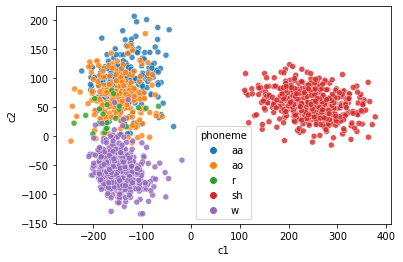

In [42]:
pca = PCA(n_components=2)
scaler = StandardScaler()

df_pca = pca.fit_transform(df_train_ph[mfcc_avg_cols])
df_pca = pd.DataFrame(df_pca, columns=['c1', 'c2'])
df_pca.index = df_train_ph.index

df_pca['accent'] = df_train_ph['accent']
df_pca['accent'] = df_pca['accent'].map(accent_map)
df_pca['gender'] = df_train_ph['gender']
df_pca['word'] = df_train_ph['word']
df_pca['phoneme'] = df_train_ph['phoneme']
df_pca['speaker'] = df_train_ph['speaker']

df_pca_brit = pca.fit_transform(df_brit_ph[mfcc_avg_cols])
df_pca_brit = pd.DataFrame(df_pca_brit, columns=['c1', 'c2'])
df_pca_brit.index = df_brit_ph.index

df_pca_brit['accent'] = df_brit_ph['accent']
df_pca_brit['gender'] = df_brit_ph['gender']
df_pca_brit['word'] = df_brit_ph['word']
df_pca_brit['phoneme'] = df_brit_ph['phoneme']
df_pca_brit['speaker'] = df_brit_ph['speaker']

sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['wash'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'wash'].phoneme.value_counts()[0:5].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.8)
plt.show()

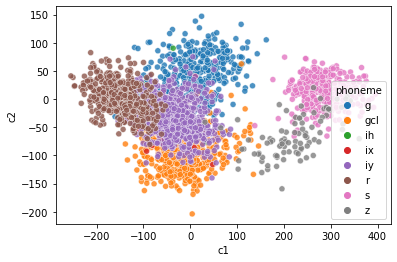

In [43]:
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['greasy'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'greasy'].phoneme.value_counts()[0:8].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.8)
plt.show()

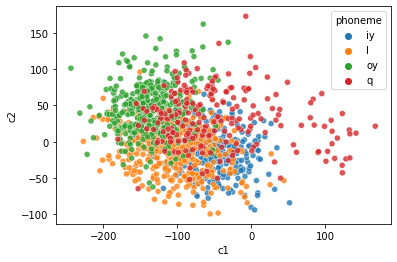

In [44]:
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['oily'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'oily'].phoneme.value_counts()[0:4].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.8)
plt.show()

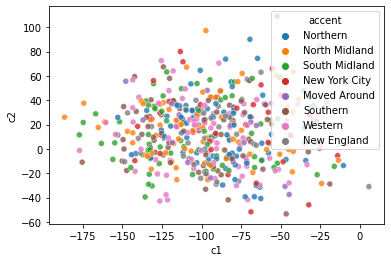

In [45]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['oily']))], x='c1', y='c2', hue='accent', alpha=0.8)
plt.show()

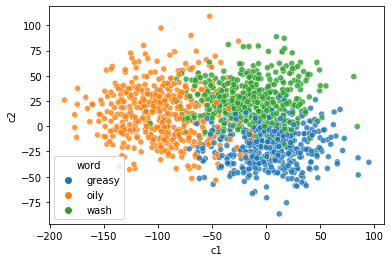

In [46]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['wash', 'greasy', 'oily']))], x='c1', y='c2', hue='word', alpha=0.8)
plt.show()

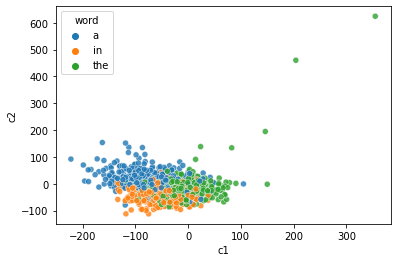

In [47]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()

df_brit_average_words = df_pca_brit.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()

sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['a', 'the', 'in']))], x='c1', y='c2', hue='word', alpha=0.8)
# plt.xlim(-200,100)
# plt.ylim(-100,100)
plt.show()

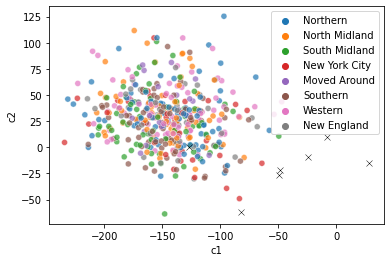

In [48]:
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['water']))], x='c1', y='c2', hue='accent', alpha=0.7)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['water']))], x='c1', y='c2', color='black', marker='x', alpha=1.0)
plt.show()

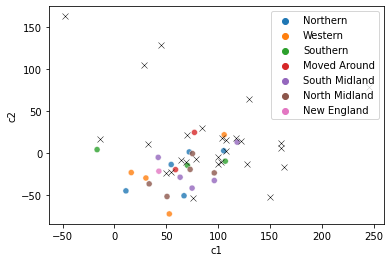

In [49]:
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['said']))], x='c1', y='c2', hue='accent', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['said']))], x='c1', y='c2', color='black', marker='x', alpha=1.0)
plt.show()

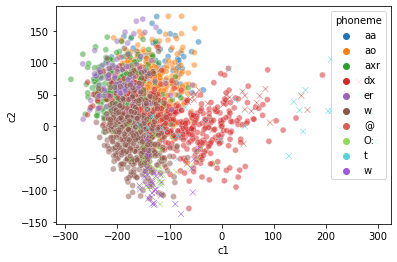

In [50]:
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['water'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'water'].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.5)
sns.scatterplot(data=df_pca_brit[(df_brit_ph['word'].isin(['water'])) & (df_brit_ph.phoneme.isin(df_brit_ph[df_brit_ph['word'] == 'water'].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', palette='hls', marker='x', alpha=1.0)
plt.show()

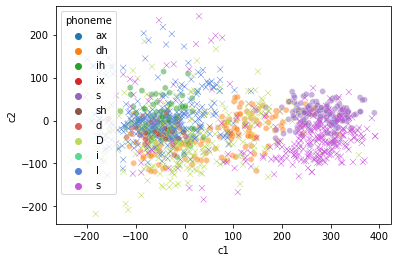

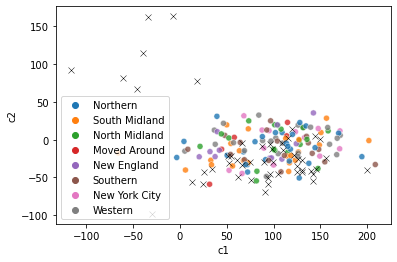

In [51]:
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['this'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'this'].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.5)
sns.scatterplot(data=df_pca_brit[(df_brit_ph['word'].isin(['this'])) & (df_brit_ph.phoneme.isin(df_brit_ph[df_brit_ph['word'] == 'this'].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', palette='hls', marker='x', alpha=1.0)
plt.show()


sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['this']))], x='c1', y='c2', hue='accent', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['this']))], x='c1', y='c2', color='black', marker='x', alpha=1.0)
plt.show()

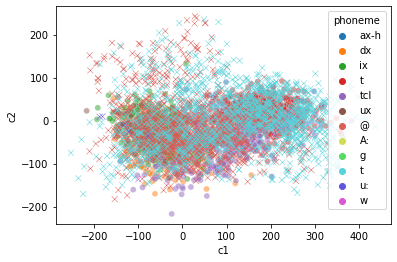

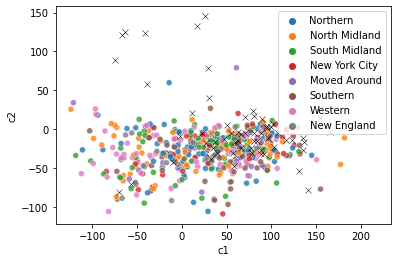

In [52]:
word = 'to'
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin([word])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == word].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.5)
sns.scatterplot(data=df_pca_brit[(df_brit_ph['word'].isin([word])) & (df_brit_ph.phoneme.isin(df_brit_ph[df_brit_ph['word'] == word].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', palette='hls', marker='x', alpha=1.0)
plt.show()


sns.scatterplot(data=df_average_words[(df_average_words['word'].isin([word]))], x='c1', y='c2', hue='accent', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin([word]))], x='c1', y='c2', color='black', marker='x', alpha=1.0)
plt.show()

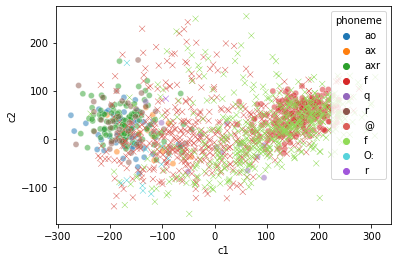

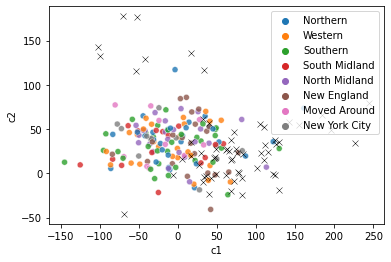

In [53]:
word = 'for'
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin([word])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == word].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.5)
sns.scatterplot(data=df_pca_brit[(df_brit_ph['word'].isin([word])) & (df_brit_ph.phoneme.isin(df_brit_ph[df_brit_ph['word'] == word].phoneme.value_counts()[0:6].index.tolist()))], x='c1', y='c2', hue='phoneme', palette='hls', marker='x', alpha=1.0)
plt.show()


sns.scatterplot(data=df_average_words[(df_average_words['word'].isin([word]))], x='c1', y='c2', hue='accent', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin([word]))], x='c1', y='c2', color='black', marker='x', alpha=1.0)
plt.show()

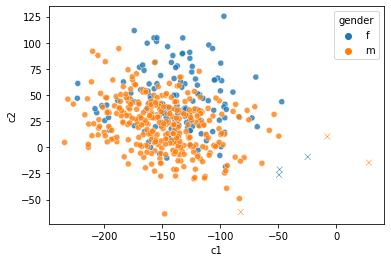

In [54]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['water']))], x='c1', y='c2', hue='gender', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['water']))], x='c1', y='c2', hue='gender', legend=False, marker='x', alpha=1.0)
plt.show()

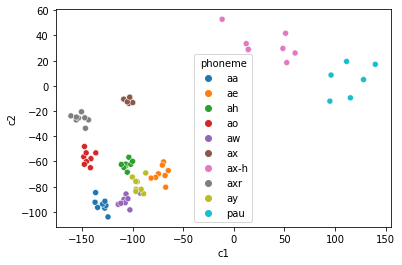

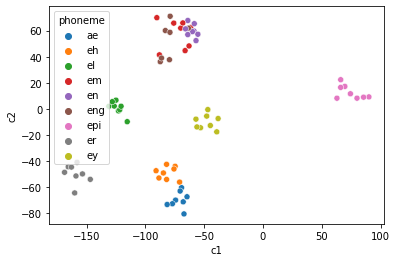

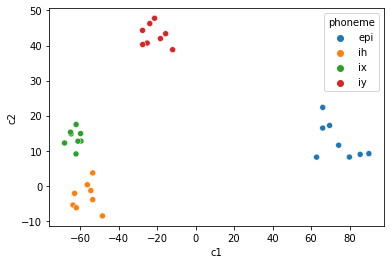

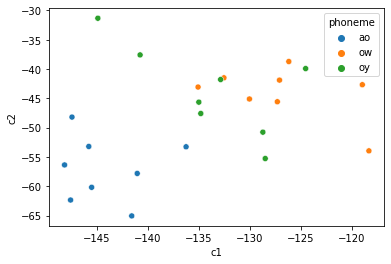

<AxesSubplot:xlabel='c1', ylabel='c2'>

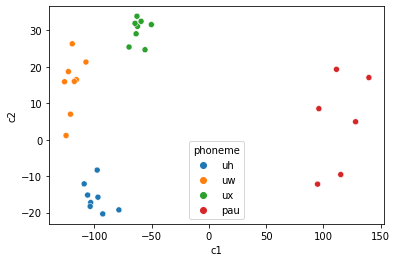

In [55]:
df_avg_phoneme = df_train_ph.groupby(['accent', 'phoneme'], as_index=False)[mfcc_avg_cols].mean()

pca = PCA(n_components=2)
scaler = StandardScaler()

df_pca_phoneme = pca.fit_transform(df_avg_phoneme[mfcc_avg_cols])
df_pca_phoneme = pd.DataFrame(df_pca_phoneme, columns=['c1', 'c2'])
df_pca_phoneme.index = df_avg_phoneme.index

df_pca_phoneme['accent'] = df_avg_phoneme['accent']
df_pca_phoneme['phoneme'] = df_avg_phoneme['phoneme']

sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('a')], x='c1', y='c2', hue='phoneme')
plt.show()
sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('e')], x='c1', y='c2', hue='phoneme')
plt.show()
sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('i')], x='c1', y='c2', hue='phoneme')
plt.show()
sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('o')], x='c1', y='c2', hue='phoneme')
plt.show()
sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('u')], x='c1', y='c2', hue='phoneme')


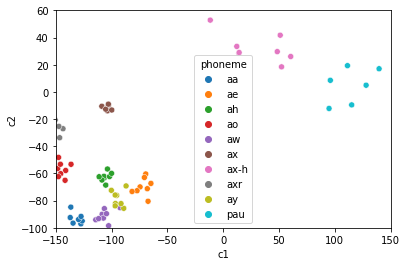

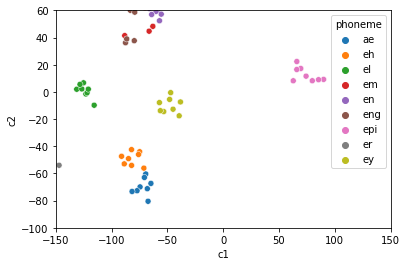

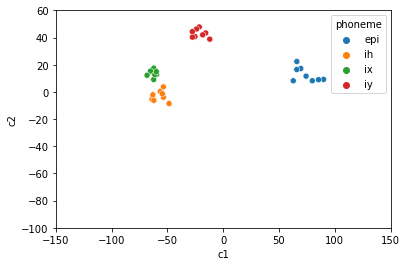

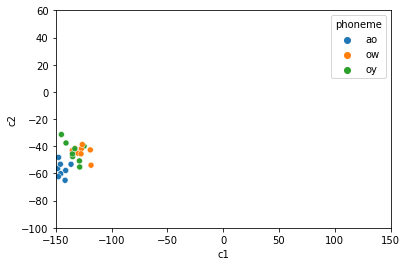

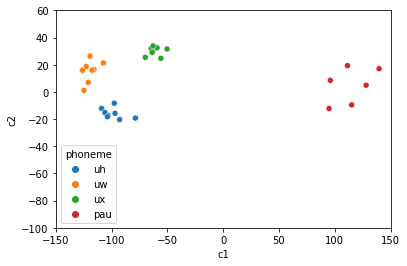

<AxesSubplot:xlabel='c1', ylabel='c2'>

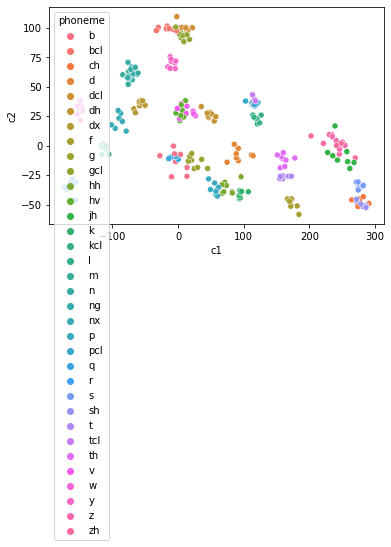

In [56]:
sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('a')], x='c1', y='c2', hue='phoneme')
plt.xlim(-150,150)
plt.ylim(-100,60)
plt.show()

sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('e')], x='c1', y='c2', hue='phoneme')
plt.xlim(-150,150)
plt.ylim(-100,60)
plt.show()

sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('i')], x='c1', y='c2', hue='phoneme')
plt.xlim(-150,150)
plt.ylim(-100,60)
plt.show()

sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('o')], x='c1', y='c2', hue='phoneme')
plt.xlim(-150,150)
plt.ylim(-100,60)
plt.show()

sns.scatterplot(data=df_pca_phoneme[df_pca_phoneme.phoneme.str.contains('u')], x='c1', y='c2', hue='phoneme')
plt.xlim(-150,150)
plt.ylim(-100,60)
plt.show()


sns.scatterplot(data=df_pca_phoneme[~((df_pca_phoneme.phoneme.str.contains('a')) | (df_pca_phoneme.phoneme.str.contains('e')) |  (df_pca_phoneme.phoneme.str.contains('i')) |  (df_pca_phoneme.phoneme.str.contains('o')) |  (df_pca_phoneme.phoneme.str.contains('u')))], 
                x='c1', y='c2', hue='phoneme')

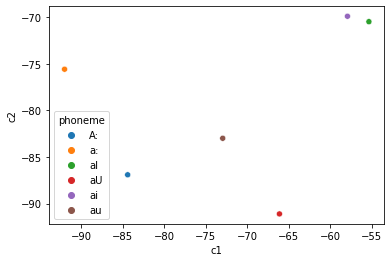

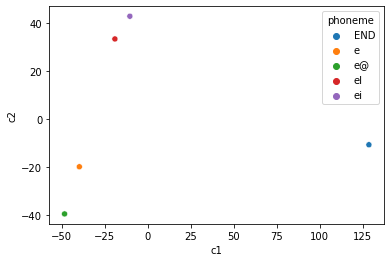

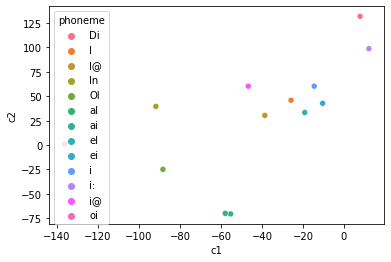

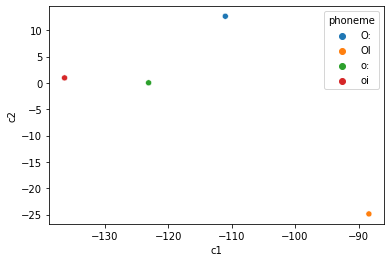

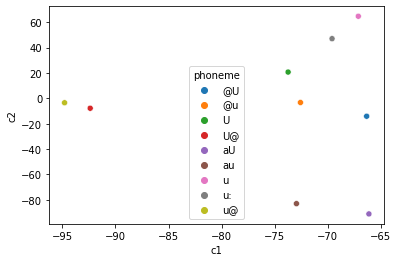

<AxesSubplot:xlabel='c1', ylabel='c2'>

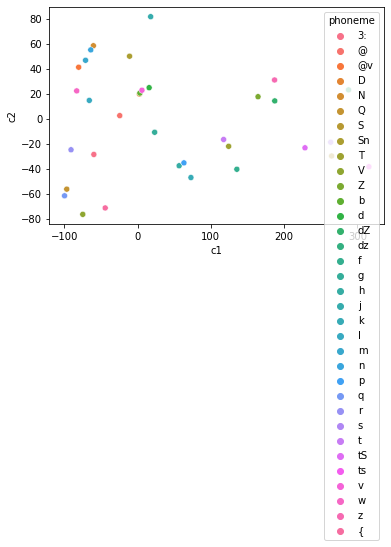

In [57]:
df_avg_phoneme_brit = df_brit_ph.groupby(['accent', 'phoneme'], as_index=False)[mfcc_avg_cols].mean()

pca = PCA(n_components=2)
scaler = StandardScaler()

df_pca_phoneme_brit = pca.fit_transform(df_avg_phoneme_brit[mfcc_avg_cols])
df_pca_phoneme_brit = pd.DataFrame(df_pca_phoneme_brit, columns=['c1', 'c2'])
df_pca_phoneme_brit.index = df_avg_phoneme_brit.index

df_pca_phoneme_brit['accent'] = df_avg_phoneme_brit['accent']
df_pca_phoneme_brit['phoneme'] = df_avg_phoneme_brit['phoneme']


sns.scatterplot(data=df_pca_phoneme_brit[df_pca_phoneme_brit.phoneme.str.lower().str.contains('a')], x='c1', y='c2', hue='phoneme')
plt.show()

sns.scatterplot(data=df_pca_phoneme_brit[df_pca_phoneme_brit.phoneme.str.lower().str.contains('e')], x='c1', y='c2', hue='phoneme')
plt.show()

sns.scatterplot(data=df_pca_phoneme_brit[df_pca_phoneme_brit.phoneme.str.lower().str.contains('i')], x='c1', y='c2', hue='phoneme')
plt.show()

sns.scatterplot(data=df_pca_phoneme_brit[df_pca_phoneme_brit.phoneme.str.lower().str.contains('o')], x='c1', y='c2', hue='phoneme')
plt.show()

sns.scatterplot(data=df_pca_phoneme_brit[df_pca_phoneme_brit.phoneme.str.lower().str.contains('u')], x='c1', y='c2', hue='phoneme')
plt.show()


sns.scatterplot(data=df_pca_phoneme_brit[~((df_pca_phoneme_brit.phoneme.str.lower().str.contains('a')) | (df_pca_phoneme_brit.phoneme.str.lower().str.contains('e')) |  (df_pca_phoneme_brit.phoneme.str.lower().str.contains('i')) |  (df_pca_phoneme_brit.phoneme.str.lower().str.contains('o')) |  (df_pca_phoneme_brit.phoneme.str.lower().str.contains('u')))], 
                x='c1', y='c2', hue='phoneme')

In [58]:
df_avg_phoneme_brit
df_avg_phoneme

dist = DistanceMetric.get_metric('euclidean')
x = dist.pairwise(df_avg_phoneme[mfcc_avg_cols])

In [59]:
df_avg_phoneme.head()

,accent,phoneme,mfcc_median_1,mfcc_median_2,mfcc_median_3,mfcc_median_4,mfcc_median_5,mfcc_median_6,mfcc_median_7,mfcc_median_8,mfcc_median_9,mfcc_median_10,mfcc_median_11,mfcc_median_12
0,DR1,aa,212.632231,-108.443576,-64.269190,-67.800390,-0.765866,4.774449,-11.890621,-3.241927,-1.462972,-6.686736,-12.056066,-16.580875
1,DR1,ae,164.450910,-99.354269,-14.815625,-52.790978,-37.901721,-14.899254,5.370916,10.945337,-6.766038,-17.864867,-16.572414,-7.355537
2,DR1,ah,197.321018,-75.066423,-39.952752,-66.917219,-11.820930,-8.682442,-21.083642,3.064782,4.198476,-4.878707,-14.040632,-13.779667
3,DR1,ao,239.616253,-51.944634,-63.079323,-98.551680,-17.007497,20.519984,-8.848268,-8.433361,-9.238736,-0.031814,1.512406,-10.614500
4,DR1,aw,199.756572,-106.931350,-55.541951,-65.303512,1.760223,3.130550,-21.457134,-1.168591,-1.412825,-10.179807,-17.803989,-15.268128


In [60]:
import numpy as np
np.fill_diagonal(x, 50000)
np.argmin(x, axis=0)

phoneme_map = df_avg_phoneme.to_dict()['phoneme']
accent_map = df_avg_phoneme.to_dict()['accent']

df_avg_phoneme['closest_phoneme_index'] = np.argmin(x, axis=0)
df_avg_phoneme['closest_phoneme'] = df_avg_phoneme['closest_phoneme_index'].map(phoneme_map)

df_avg_phoneme[df_avg_phoneme.phoneme != df_avg_phoneme.closest_phoneme][['accent', 'phoneme', 'closest_phoneme']]

,accent,phoneme,closest_phoneme
58,DR1,zh,jh
77,DR2,em,m
79,DR2,eng,n
118,DR2,zh,jh
138,DR3,en,n
139,DR3,eng,ng
162,DR3,pau,kcl
183,DR4,aw,ay
186,DR4,axr,r
190,DR4,ch,sh


In [61]:
np.argmin(distances)

NameError: name 'distances' is not defined

In [ ]:
from scipy.spatial import distance

american_british_phoneme_map = {}
american_british_accent_map = {}

for phoneme in df_avg_phoneme_brit.phoneme.unique():
    
    phoneme_mfccs = df_pca_phoneme_brit[df_pca_phoneme_brit.phoneme == phoneme][['c1', 'c2']]
    
    distances = distance.cdist(phoneme_mfccs, df_pca_phoneme[['c1', 'c2']], 'euclidean')
    
    american_british_phoneme_map[phoneme] = phoneme_map[np.argmin(distances)]
    american_british_accent_map[phoneme] = accent_map[np.argmin(distances)]
    

american_british_phoneme_map
american_british_accent_map

In [ ]:
sns.scatterplot(data=df_pca_phoneme, x='c1', y='c2', hue='accent')
sns.scatterplot(data=df_pca_phoneme_brit, x='c1', y='c2', hue='accent', marker = 'x')
plt.show()

In [ ]:
from collections import Counter

counts = Counter()

for k, v in american_british_accent_map.items():
    counts[v] += 1
    
counts

# Formant Results

In [ ]:
mfcc_avg_cols = [x for x in df_train_ph.columns if x in ('f1', 'f2', 'f3', 'f4', 'f5')]
# mfcc_avg_cols = ['f1_f2', 'f1_f3', 'f1_f4', 'f1_f5']

In [ ]:
df_train_ph.dropna(inplace=True)
df_brit_ph.dropna(inplace=True)

df_train_ph['f1_f2'] = df_train_ph.f1 / df_train_ph.f2
df_train_ph['f1_f3'] = df_train_ph.f1 / df_train_ph.f3
df_train_ph['f1_f4'] = df_train_ph.f1 / df_train_ph.f4
df_train_ph['f1_f5'] = df_train_ph.f1 / df_train_ph.f5

df_brit_ph['f1_f2'] = df_brit_ph.f1 / df_brit_ph.f2
df_brit_ph['f1_f3'] = df_brit_ph.f1 / df_brit_ph.f2
df_brit_ph['f1_f4'] = df_brit_ph.f1 / df_brit_ph.f2
df_brit_ph['f1_f5'] = df_brit_ph.f1 / df_brit_ph.f2

In [ ]:
pca = PCA(n_components=2)
scaler = StandardScaler()

df_pca = pca.fit_transform(df_train_ph[mfcc_avg_cols])
df_pca = pd.DataFrame(df_pca, columns=['c1', 'c2'])
df_pca.index = df_train_ph.index

df_pca['accent'] = df_train_ph['accent']
df_pca['accent'] = df_pca['accent'].map(accent_map)
df_pca['gender'] = df_train_ph['gender']
df_pca['word'] = df_train_ph['word']
df_pca['phoneme'] = df_train_ph['phoneme']
df_pca['speaker'] = df_train_ph['speaker']

df_pca_brit = pca.fit_transform(df_brit_ph[mfcc_avg_cols])
df_pca_brit = pd.DataFrame(df_pca_brit, columns=['c1', 'c2'])
df_pca_brit.index = df_brit_ph.index

df_pca_brit['accent'] = df_brit_ph['accent']
df_pca_brit['gender'] = df_brit_ph['gender']
df_pca_brit['word'] = df_brit_ph['word']
df_pca_brit['phoneme'] = df_brit_ph['phoneme']
df_pca_brit['speaker'] = df_brit_ph['speaker']

sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['wash'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'wash'].phoneme.value_counts()[0:5].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.8)
plt.show()

In [ ]:
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['greasy'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'greasy'].phoneme.value_counts()[0:8].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.8)
plt.show()

In [ ]:
sns.scatterplot(data=df_pca[(df_train_ph['word'].isin(['oily'])) & (df_train_ph.phoneme.isin(df_train_ph[df_train_ph['word'] == 'oily'].phoneme.value_counts()[0:4].index.tolist()))], x='c1', y='c2', hue='phoneme', alpha=0.8)
plt.show()

In [ ]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()

df_brit_average_words = df_pca_brit.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()

sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['a', 'the', 'in']))], x='c1', y='c2', hue='word', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['a', 'the', 'in']))], x='c1', y='c2', hue='word', marker='x', alpha=1.0, legend=False)

# plt.xlim(-200,100)
# plt.ylim(-100,100)
plt.show()

In [ ]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['oily']))], x='c1', y='c2', hue='accent', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['oily']))], x='c1', y='c2', hue='accent', alpha=1.0, marker='x')

plt.show()

In [ ]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['wash', 'greasy', 'oily']))], x='c1', y='c2', hue='word', alpha=0.8)
plt.show()

In [ ]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['a']))], x='c1', y='c2', hue='gender', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['a']))], x='c1', y='c2', hue='gender', marker='x', legend=False, alpha=1.0)
plt.show()

In [ ]:
df_average_words = df_pca.groupby(['speaker', 'word', 'accent', 'gender'], as_index=False)[['c1', 'c2']].mean()
sns.scatterplot(data=df_average_words[(df_average_words['word'].isin(['water']))], x='c1', y='c2', hue='gender', alpha=0.8)
sns.scatterplot(data=df_brit_average_words[(df_brit_average_words['word'].isin(['water']))], x='c1', y='c2', hue='gender', legend=False, marker='x', alpha=1.0)
plt.show()

## Word Exploration

In [ ]:
df_train_words_mfcc = pd.read_csv('../data/all_words_mfcc.csv')
df_test_words_mfcc = pd.read_csv('../data/all_words_train_mfcc.csv')

In [ ]:
mfcc_avg_cols = [x for x in df_train_words_mfcc.columns if 'feature' in x]
mfcc_avg_cols

In [ ]:
pca = PCA(n_components=2)
scaler = StandardScaler()

df_pca = pca.fit_transform(df_train_words_mfcc[mfcc_avg_cols])
df_pca = pd.DataFrame(df_pca, columns=['c1', 'c2'])
df_pca.index = df_train_words_mfcc.index

df_pca['accent'] = df_train_words_mfcc['accent']
df_pca['accent'] = df_pca['accent'].map(accent_map)
df_pca['gender'] = df_train_words_mfcc['gender']
df_pca['word'] = df_train_words_mfcc['word']

sns.scatterplot(data=df_pca[(df_train_words_mfcc['word'].isin(['oily']))], x='c1', y='c2', hue='gender', alpha=0.8)
plt.show()

In [ ]:
df_train_words_mfcc.speaker.value_counts()